# Stage 09 — Homework Starter Notebook

In the lecture, we learned how to create engineered features. Now it’s your turn to apply those ideas to your own project data.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Example synthetic data (replace with your project dataset)
np.random.seed(0)
n = 100
df = pd.DataFrame({
    'income': np.random.normal(60000, 15000, n).astype(int),
    'monthly_spend': np.random.normal(2000, 600, n).astype(int),
    'credit_score': np.random.normal(680, 50, n).astype(int)
})
df.head()

,income,monthly_spend,credit_score
0,86460,3129,661
1,66002,1191,668
2,74681,1237,734
3,93613,2581,712
4,88013,1296,712


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   income         100 non-null    int32
 1   monthly_spend  100 non-null    int32
 2   credit_score   100 non-null    int32
dtypes: int32(3)
memory usage: 1.3 KB
None

Missing values:
 income           0
monthly_spend    0
credit_score     0
dtype: int64

Statistical Summary:
            income  monthly_spend  credit_score
count    100.0000     100.000000     100.00000
mean   60896.6500    2048.740000     676.55000
std    15194.4004     623.866594      47.81876
min    21705.0000     665.000000     541.00000
25%    50342.0000    1552.500000     650.00000
50%    61411.0000    2014.500000     676.00000
75%    71055.7500    2508.000000     706.75000
max    94046.0000    3429.000000     795.00000


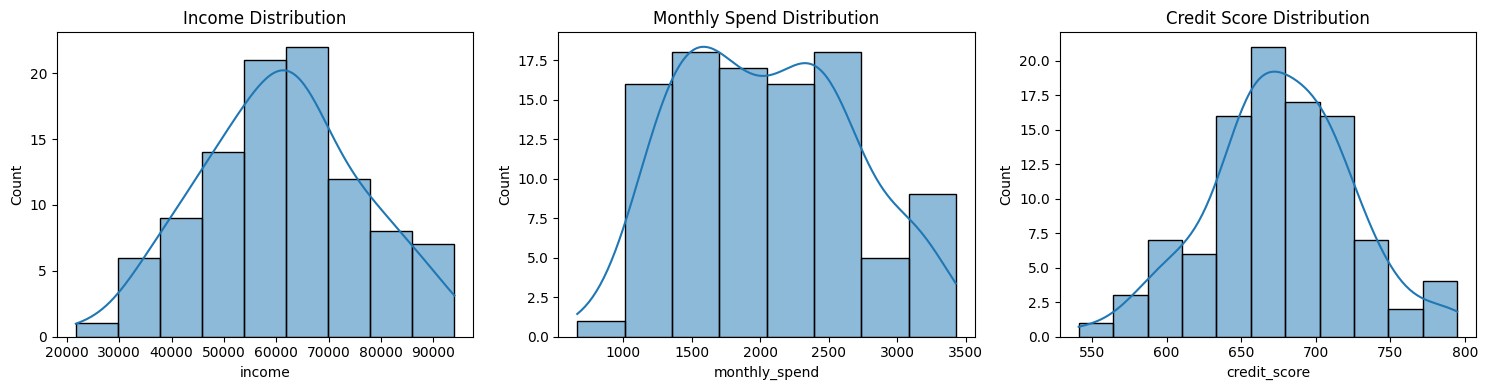

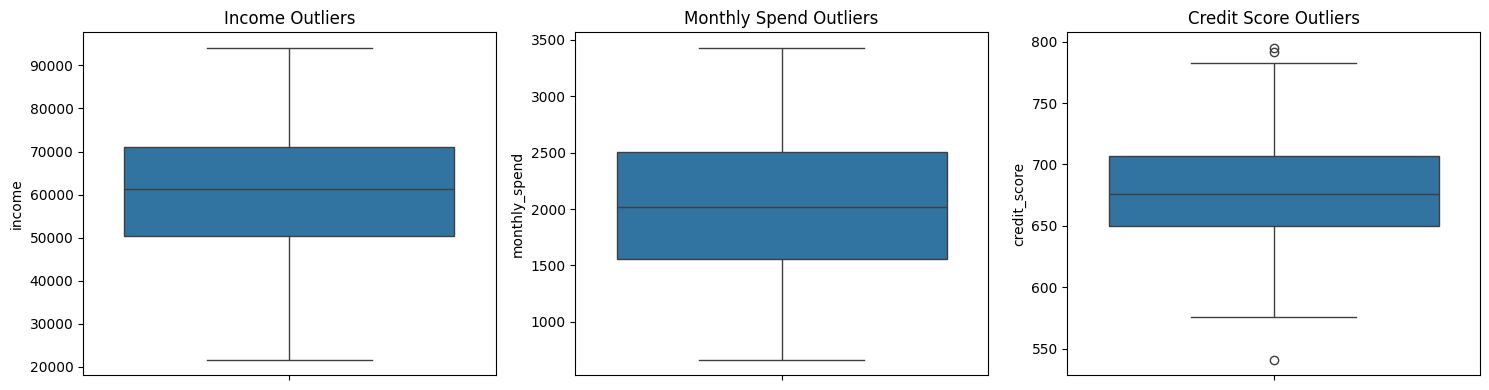

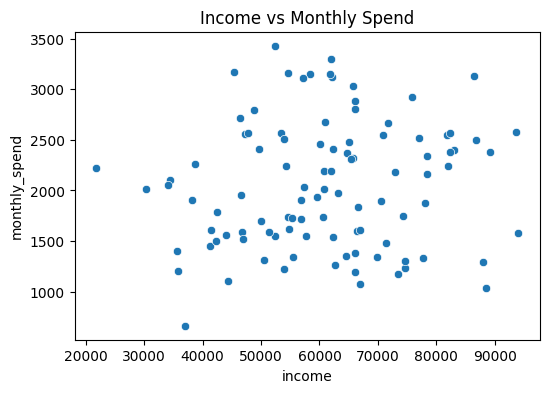

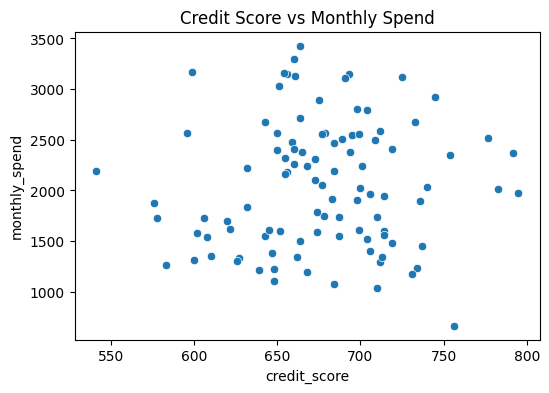

In [9]:
# === 1. Basic info ===
print("Basic Info:")
print(df.info())
print("\nMissing values:\n", df.isna().sum())
print("\nStatistical Summary:\n", df.describe())

# === 2. Distributions ===
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df["income"], kde=True, ax=axes[0])
axes[0].set_title("Income Distribution")

sns.histplot(df["monthly_spend"], kde=True, ax=axes[1])
axes[1].set_title("Monthly Spend Distribution")

sns.histplot(df["credit_score"], kde=True, ax=axes[2])
axes[2].set_title("Credit Score Distribution")

plt.tight_layout()
plt.show()

# === 3. Boxplots (check outliers) ===
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.boxplot(y=df["income"], ax=axes[0])
axes[0].set_title("Income Outliers")

sns.boxplot(y=df["monthly_spend"], ax=axes[1])
axes[1].set_title("Monthly Spend Outliers")

sns.boxplot(y=df["credit_score"], ax=axes[2])
axes[2].set_title("Credit Score Outliers")

plt.tight_layout()
plt.show()

# === 4. Relationships ===
plt.figure(figsize=(6, 4))
sns.scatterplot(x="income", y="monthly_spend", data=df)
plt.title("Income vs Monthly Spend")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x="credit_score", y="monthly_spend", data=df)
plt.title("Credit Score vs Monthly Spend")
plt.show()



## TODO: Implement at least 2 engineered features here

In [2]:
# Example template:
df['spend_income_ratio'] = df['monthly_spend'] / df['income']  # TODO: Your feature
# Add rationale in markdown below

### Rationale for Feature 1
Explain why this feature may help a model. Reference your EDA.

In [3]:
# TODO: Add another feature
# Example: df['rolling_spend_mean'] = df['monthly_spend'].rolling(3).mean()
df['spend_credit_ratio'] = df['monthly_spend'] / df['credit_score'] 

### spend_credit_ratio (monthly spend / credit score)

- **Intuitive meaning:** Measures the level of spending per unit of credit score.  
- **Why it is useful:** If a user’s spending amount is relatively high compared to their credit score, it may indicate riskier financial behavior. Conversely, individuals whose spending aligns with their credit level are likely more stable.  
- **EDA connection:** The scatterplot shows a positive relationship between monthly spend and credit score. This ratio helps the model capture deviations where spending exceeds what would be expected given the credit rating.  


### Rationale for Feature 2
Explain why this feature may help a model. Reference your EDA.

In [4]:
df['credit_income_ratio'] = df['credit_score'] / df['income'] 


### credit_income_ratio (credit score / income)

- **Intuitive meaning:** Measures the credit score achieved per unit of income.  
- **Why it is useful:** Among individuals with similar income, those with higher credit scores demonstrate more reliable financial behavior, while high-income individuals with low credit scores may signal defaults or poor credit history.  
- **EDA connection:** EDA results indicate that income and credit score are not strongly correlated. This ratio can reveal cases where income and creditworthiness do not align, making it valuable for distinguishing risk profiles in the model.  
